<a href="https://colab.research.google.com/github/Shakib-Mahmud-Ayon/BME-310-Project/blob/main/Project_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libreries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_validate,ShuffleSplit
from sklearn.metrics import make_scorer,recall_score,accuracy_score,precision_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import glob
from keras.models import Sequential, load_model
from keras.layers import Dense
import keras as k

# Loading the data

In [ ]:
df = pd.read_csv('/content/chronic_kidney_disease_indexed_new.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Adding header

In [ ]:
headers = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','htn','dm','cad','appet','pe','ane','classification']

In [ ]:
df.columns = headers
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape

(400, 25)

# How many missing data we have and replace them with NaN's

In [ ]:
count=0
for i in range(0,400):
    for j in range(0,25):
        if (df.iloc[i,j]=='?'):
            count =count+1
print(count)

1012


####So, we have 1012 missing data

In [ ]:
df = df.replace('?', np.NaN)

In [ ]:
(df == "?").values.any()

False

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,18,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


So, all missing data is replaced by NaN successfully

# The distribution of our missing data

Text(0, 0.5, 'Count of NaN')

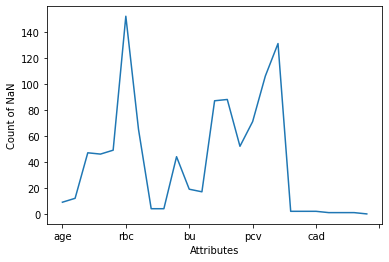

In [ ]:
pd.isnull(df).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Text(0, 0.5, 'Count of NaN')

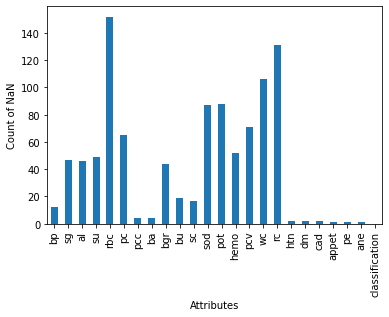

In [ ]:
pd.isnull(df).sum()[1:50].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

# Checking all datatypes

In [ ]:
df.dtypes

age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

There all datatypes are in object form, Lets fix these

In [ ]:
df[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc',]] = df[['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc',]].astype("float64")
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# Transforming the non-numeric data in the columns

In [ ]:
df.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


# Replacing NaN with maximum frequency value



In [ ]:
for i in df.columns:
  if df[i].dtype != object:
    df[i].replace(np.nan, df[i].value_counts().idxmax(), inplace = True)
    df[i].isnull().values.any()

In [ ]:
df.head(15)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,135.0,5.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,99.0,18.0,0.8,135.0,5.0,11.3,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,135.0,5.0,9.6,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,135.0,5.0,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36.0,9800.0,5.2,no,no,no,good,no,no,ckd
7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,135.0,5.0,12.4,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,135.0,5.0,10.8,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [ ]:
for i in df.columns:
  if df[i].dtype == object:
    print(df[i].value_counts())
    print(df[i].value_counts().idxmax())
    print()

normal      201
abnormal     47
Name: rbc, dtype: int64
normal

normal      259
abnormal     76
Name: pc, dtype: int64
normal

notpresent    354
present        42
Name: pcc, dtype: int64
notpresent

notpresent    374
present        22
Name: ba, dtype: int64
notpresent

no     251
yes    147
Name: htn, dtype: int64
no

no     261
yes    137
Name: dm, dtype: int64
no

no     364
yes     34
Name: cad, dtype: int64
no

good    317
poor     82
Name: appet, dtype: int64
good

no     323
yes     76
Name: pe, dtype: int64
no

no     339
yes     60
Name: ane, dtype: int64
no

ckd       250
notckd    150
Name: classification, dtype: int64
ckd



In [ ]:

df["rbc"].replace(np.nan, "normal", inplace = True)
df["rbc"].replace({"normal": "0", "abnormal": "1"}, inplace=True)


df["pc"].replace(np.nan, "normal", inplace = True)
df["pc"].replace({"normal": "0", "abnormal": "1"}, inplace=True)


df["pcc"].replace(np.nan, "notpresent", inplace = True)
df["pcc"].replace({"present": "0", "notpresent": "1"}, inplace=True)


df["ba"].replace(np.nan, "notpresent", inplace = True)
df["ba"].replace({"present": "0", "notpresent": "1"}, inplace=True)


df["htn"].replace(np.nan, "no", inplace = True)
df["htn"].replace({"yes": "0", "no": "1"}, inplace=True)

df["dm"].replace(np.nan, "no", inplace = True)
df["dm"].replace({"yes": "0", "no": "1"}, inplace=True)

df["cad"].replace(np.nan, "no", inplace = True)
df["cad"].replace({"yes": "0", "no": "1"}, inplace=True)


df["appet"].replace(np.nan, "good", inplace = True)
df["appet"].replace({"good": "0", "poor": "1"}, inplace=True)


df["pe"].replace(np.nan, "no", inplace = True)
df["pe"].replace({"yes": "0", "no": "1"}, inplace=True)


df["ane"].replace(np.nan, "no", inplace = True)
df["ane"].replace({"yes": "0", "no": "1"}, inplace=True)

df["classification"].replace({"ckd": "0", "notckd": "1"}, inplace=True)


In [ ]:
for i in df.columns:
  if df[i].dtype == object:
    print(df[i].value_counts())
    print(df[i].value_counts().idxmax())
    print()

0    353
1     47
Name: rbc, dtype: int64
0

0    324
1     76
Name: pc, dtype: int64
0

1    358
0     42
Name: pcc, dtype: int64
1

1    378
0     22
Name: ba, dtype: int64
1

1    253
0    147
Name: htn, dtype: int64
1

1    263
0    137
Name: dm, dtype: int64
1

1    366
0     34
Name: cad, dtype: int64
1

0    318
1     82
Name: appet, dtype: int64
0

1    324
0     76
Name: pe, dtype: int64
1

1    340
0     60
Name: ane, dtype: int64
1

0    250
1    150
Name: classification, dtype: int64
0



In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,1,1,121.0,36.0,1.2,135.0,5.0,15.4,44.0,7800.0,5.2,0,0,1,0,1,1,0
1,7.0,50.0,1.020,4.0,0.0,0,0,1,1,99.0,18.0,0.8,135.0,5.0,11.3,38.0,6000.0,5.2,1,1,1,0,1,1,0
2,62.0,80.0,1.010,2.0,3.0,0,0,1,1,423.0,53.0,1.8,135.0,5.0,9.6,31.0,7500.0,5.2,1,0,1,1,1,0,0
3,48.0,70.0,1.005,4.0,0.0,0,1,0,1,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0,1,1,1,0,0,0
4,51.0,80.0,1.010,2.0,0.0,0,0,1,1,106.0,26.0,1.4,135.0,5.0,11.6,35.0,7300.0,4.6,1,1,1,0,1,1,0


In [ ]:
df[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']] = df[['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane','classification']].astype('int64')

#  Seperating the data

In [ ]:
X = df.drop(['classification'], axis = 1)
y = df['classification']


In [ ]:
#FOR ANN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification using svc


Linear SVM

In [ ]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(clf,X,y,cv=5,scoring=scoring)
sl = np.mean(cv_val['test_accuracy'])
sl_prec = np.mean(cv_val['test_precision'])
sl_sensi =   np.mean(cv_val['test_recall'])
sl_specificty = np.mean(cv_val['test_specificity'])


In [ ]:
print(sl)
print(sl_prec)
print(sl_sensi)
print(sl_specificty)

0.9624999999999998
0.9585241935483871
0.9620000000000001
0.9640000000000001


Quadratic SVM


In [ ]:
clf2=SVC(kernel='poly', degree=2)
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(clf2,X,y,cv=5,scoring=scoring)
sq = np.mean(cv_val['test_accuracy'])
sq_prec = np.mean(cv_val['test_precision'])
sq_sensi =   np.mean(cv_val['test_recall'])
sq_specificty = np.mean(cv_val['test_specificity'])

In [ ]:
print(sq)
print(sq_prec)
print(sq_sensi)
print(sq_specificty)

0.6625
0.636048297439807
0.626
0.7719999999999999




# Using KNN

KNN

In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(knn,X,y,cv=5,scoring=scoring)
k5 = np.mean(cv_val['test_accuracy'])
k5_prec = np.mean(cv_val['test_precision'])
k5_sensi =   np.mean(cv_val['test_recall'])
k5_specificty = np.mean(cv_val['test_specificity'])

print(k5)
print(k5_prec)
print(k5_sensi)
print(k5_specificty)

0.7124999999999999
0.7196341697254608
0.7313333333333333
0.6559999999999999


Choosing the value of K by elbow method

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []
for i in range(1,40):
  knn_test = neighbors.KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn_test, X,y, cv= 5)
  accuracy_rate.append(score.mean())

Text(0, 0.5, 'acuracy rate')

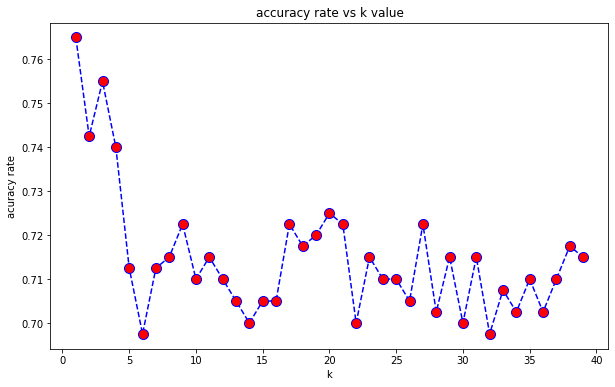

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40), accuracy_rate, color='blue', linestyle= 'dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('acuracy rate')

As we can see at K= 2 accuracy is highest
Lets, run the classification again for k=1 Which is fine knn

Fine knn

In [ ]:
knn_fine = neighbors.KNeighborsClassifier(n_neighbors=1, n_jobs=-1)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(knn_fine,X,y,cv=5,scoring=scoring)
f = np.mean(cv_val['test_accuracy'])
f_prec = np.mean(cv_val['test_precision'])
f_sensi =   np.mean(cv_val['test_recall'])
f_specificty = np.mean(cv_val['test_specificity'])

print(f)
print(f_prec)
print(f_sensi)
print(f_specificty)

0.7649999999999999
0.7558476058638572
0.7693333333333332
0.752


Medium Knn

In [ ]:
knn_medium = neighbors.KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(knn_medium,X,y,cv=5,scoring=scoring)
m = np.mean(cv_val['test_accuracy'])
m_prec = np.mean(cv_val['test_precision'])
m_sensi =   np.mean(cv_val['test_recall'])
m_specificty = np.mean(cv_val['test_specificity'])

print(m)
print(m_prec)
print(m_sensi)
print(m_specificty)

0.71
0.7089079877066158
0.7186666666666666
0.6839999999999999


Coarse Knn

In [ ]:
knn_coarse = neighbors.KNeighborsClassifier(n_neighbors=100, n_jobs=-1)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(knn_coarse,X,y,cv=5,scoring=scoring)
c = np.mean(cv_val['test_accuracy'])
c_prec = np.mean(cv_val['test_precision'])
c_sensi =   np.mean(cv_val['test_recall'])
c_specificty = np.mean(cv_val['test_specificity'])

print(c)
print(c_prec)
print(c_sensi)
print(c_specificty)

0.6824999999999999
0.667092133183219
0.67
0.72


Weighted knn

In [ ]:
knn_weighted = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='ball_tree', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=-1)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(knn_weighted,X,y,cv=5,scoring=scoring)
wk = np.mean(cv_val['test_accuracy'])
wk_prec = np.mean(cv_val['test_precision'])
wk_sensi =   np.mean(cv_val['test_recall'])
wk_specificty = np.mean(cv_val['test_specificity'])

print(wk)
print(wk_prec)
print(wk_sensi)
print(wk_specificty)

0.7175
0.7295025287278921
0.7406666666666666
0.648


# Classification using RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(n_estimators=70,random_state=0,n_jobs=-1)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(clf_rf,X,y,cv=5,scoring=scoring)
rf = np.mean(cv_val['test_accuracy'])
rf_prec = np.mean(cv_val['test_precision'])
rf_sensi =   np.mean(cv_val['test_recall'])
rf_specificty = np.mean(cv_val['test_specificity'])

print(rf)
print(rf_prec)
print(rf_sensi)
print(rf_specificty)

1.0
1.0
1.0
1.0


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(random_state=0)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(DTmodel,X,y,cv=5,scoring=scoring)
dt = np.mean(cv_val['test_accuracy'])
dt_prec = np.mean(cv_val['test_precision'])
dt_sensi =   np.mean(cv_val['test_recall'])
dt_specificty = np.mean(cv_val['test_specificity'])

print(dt)
print(dt_prec)
print(dt_sensi)
print(dt_specificty)

0.9649999999999999
0.9631380067642699
0.9626666666666666
0.9719999999999999


# Valdation curve

In [ ]:
from sklearn.model_selection import validation_curve

parameter_range = np.arange(1,  400,  10)
train_score, test_score = validation_curve(RandomForestClassifier(), X, y,
                          param_name = "n_estimators",
                          param_range = parameter_range,
                          cv = 5, scoring = "accuracy")
mean_train_score  =  np.mean(train_score,  axis  =  1)
std_train_score  =  np.std(train_score,  axis  =  1)
mean_test_score  =  np.mean(test_score,  axis  =  1)
std_test_score  =  np.std(test_score,  axis  =  1)

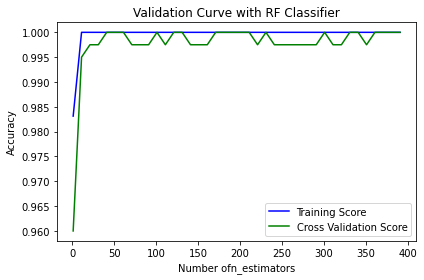

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting
import matplotlib.pyplot as plt
plt.plot(parameter_range, mean_train_score,
 label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
 label = "Cross Validation Score", color = 'g')

plt.title("Validation Curve with RF Classifier")
plt.xlabel("Number ofn_estimators")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()
plt.savefig('Validation_curve.jpg',dpi=300)

# ANN

In [ ]:
model_ann  = Sequential()
model_ann.add( Dense(256, input_dim = len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation = 'relu'))
model_ann.add( Dense(1, activation = 'hard_sigmoid'))

In [ ]:
model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model_ann.fit(X_train, y_train, epochs=200, batch_size=X_train.shape[0])

Epoch 1/200
1/1 [==============================] - 15s 15s/step - loss: 0.6952 - accuracy: 0.4750
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6787 - accuracy: 0.6250
Epoch 3/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6635 - accuracy: 0.6313
Epoch 4/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6496 - accuracy: 0.6313
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 0.6365 - accuracy: 0.6313
Epoch 6/200
1/1 [==============================] - 0s 9ms/step - loss: 0.6242 - accuracy: 0.6313
Epoch 7/200
1/1 [==============================] - 0s 7ms/step - loss: 0.6123 - accuracy: 0.6313
Epoch 8/200
1/1 [==============================] - 0s 8ms/step - loss: 0.6007 - accuracy: 0.6313
Epoch 9/200
1/1 [==============================] - 0s 9ms/step - loss: 0.5893 - accuracy: 0.6313
Epoch 10/200
1/1 [==============================] - 0s 8ms/step - loss: 0.5782 - accuracy: 0.6313
Epoch 11/200
1/1 [========

In [ ]:
model_ann.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


Text(0.5, 0, 'epoch')

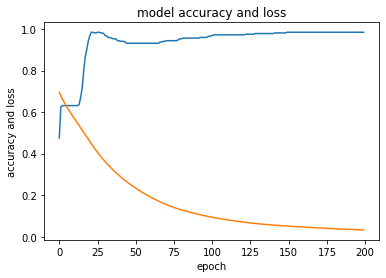

In [ ]:
#visualizing the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [ ]:
pred_ann = model_ann.predict(X_test)
pred_ann

array([[0.31095237],
       [0.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.51103663],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.7555455 ],
       [0.        ],
       [0.        ],
       [0.939111  ],
       [0.75228715],
       [0.00304431],
       [0.        ],
       [0.80867004],
       [1.        ],
       [0.34443945],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.183

In [ ]:
pred_ann = [1 if y>0.5 else 0 for y in pred_ann]
pred_ann

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1]

In [ ]:
print('original : {0}'.format(", ".join(str(x) for x in y_test)))
print('predicted : {0}'.format(", ".join(str(x) for x in pred_ann)))

original : 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1
predicted : 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1


In [ ]:
ann = accuracy_score(y_test, pred_ann)
ann

0.975

In [ ]:
mat = metrics.confusion_matrix(y_test, pred_ann)
print(mat)

[[46  2]
 [ 0 32]]


In [ ]:
ann_specificity = mat[0][0]/ (mat[0][0] + mat[0][1])
print(ann_specificity)
ann_sensi = mat[1][1]/ (mat[1][1] + mat[1][0])
print(ann_sensi)
ann_prec = mat[1][1]/ (mat[1][1] + mat[0][1])
print(ann_prec)

0.9583333333333334
1.0
0.9411764705882353


# Accuracy comparision

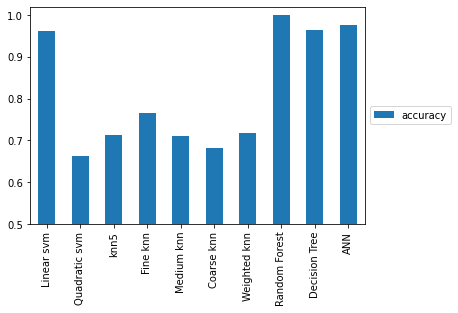

In [ ]:
acc = {"name":["Linear svm", "Quadratic svm", "knn5", "Fine knn", "Medium knn", "Coarse knn", "Weighted knn", "Random Forest", "Decision Tree","ANN"]
       ,"accuracy":[sl,sq,k5,f,m,c,wk,rf,dt,ann]}
ac_gp = pd.DataFrame(acc, columns = ["accuracy"], index = acc["name"])
ac_gp.plot(kind = "bar")
plt.ylim([ 0.5, 1.02])
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Specificity, Precision, Sensitivity Comparison

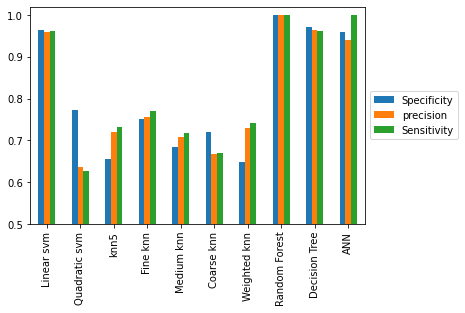

In [ ]:
sps = {"name":["Linear svm", "Quadratic svm", "knn5", "Fine knn", "Medium knn", "Coarse knn", "Weighted knn", "Random Forest", "Decision Tree","ANN"]
       ,"Specificity":[sl_specificty,sq_specificty,k5_specificty,f_specificty,m_specificty,c_specificty,wk_specificty,rf_specificty,dt_specificty,ann_specificity]
       ,"precision":[sl_prec,sq_prec,k5_prec,f_prec,m_prec,c_prec,wk_prec,rf_prec,dt_prec,ann_prec]
       ,"Sensitivity":[sl_sensi,sq_sensi,k5_sensi,f_sensi,m_sensi,c_sensi,wk_sensi,rf_sensi,dt_sensi,ann_sensi]
       }
sps_df = pd.DataFrame(sps, columns = ["Specificity","precision","Sensitivity"], index = sps["name"])
sps_df.plot(kind = "bar")
plt.ylim([ 0.5, 1.02])
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Lets Train the data set excludind the attributes which have missing value over 100 with Basic 3 classifier

In [ ]:
L=df[['age','bp','sg','al','su','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','htn','dm','cad','appet','pe','ane','classification']].values
m=df['classification'].values

Excluding rbc, rc and wc

Using SVC

In [ ]:
clf_w=SVC(kernel='linear')

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(clf_w,L,m,cv=5,scoring=scoring)
SVC_without_3_columns = np.mean(cv_val['test_accuracy'])
SVC_without_3_columns_prec = np.mean(cv_val['test_precision'])
SVC_without_3_columns_sensi =   np.mean(cv_val['test_recall'])
SVC_without_3_columns_specificty = np.mean(cv_val['test_specificity'])

print(SVC_without_3_columns)
print(SVC_without_3_columns_prec)
print(SVC_without_3_columns_sensi)
print(SVC_without_3_columns_specificty)

1.0
1.0
1.0
1.0


Using Random Forest

In [ ]:
clf2_w=RandomForestClassifier(n_estimators=70, random_state=0, n_jobs=-1)
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(clf2_w,L,m,cv=5,scoring=scoring)
RF_without_3_columns = np.mean(cv_val['test_accuracy'])
RF_without_3_columns_prec = np.mean(cv_val['test_precision'])
RF_without_3_columns_sensi =   np.mean(cv_val['test_recall'])
RF_without_3_columns_specificty = np.mean(cv_val['test_specificity'])

print(RF_without_3_columns)
print(RF_without_3_columns_prec)
print(RF_without_3_columns_sensi)
print(RF_without_3_columns_specificty)


1.0
1.0
1.0
1.0


Using Knn

In [ ]:
knn5_w=neighbors.KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score,average='macro'),
            'recall': make_scorer(recall_score,average='macro'),'specificity': make_scorer(recall_score,pos_label=0)}

cv = ShuffleSplit(n_splits=5)
cv_val = cross_validate(knn5_w,L,m,cv=5,scoring=scoring)
K5_without_3_columns = np.mean(cv_val['test_accuracy'])
K5_without_3_columns_prec = np.mean(cv_val['test_precision'])
K5_without_3_columns_sensi =   np.mean(cv_val['test_recall'])
K5_without_3_columns_specificty = np.mean(cv_val['test_specificity'])

print(K5_without_3_columns)
print(K5_without_3_columns_prec)
print(K5_without_3_columns_sensi)
print(K5_without_3_columns_specificty)

0.8375
0.829462067859813
0.8393333333333335
0.8320000000000001


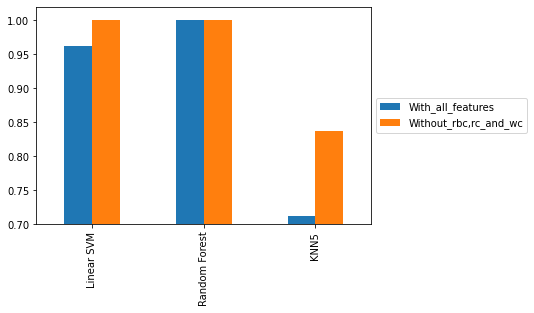

In [ ]:
acc1 = {"name":["Linear SVM","Random Forest","KNN5"],
        "With_all_features":[sl,rf,k5],
        "Without_rbc,rc_and_wc":[SVC_without_3_columns,RF_without_3_columns,K5_without_3_columns]}
WW_features_df = pd.DataFrame(acc1, columns = ["With_all_features","Without_rbc,rc_and_wc"], index = acc1["name"])
WW_features_df.plot(kind = "bar")
plt.ylim([ 0.7, 1.02])
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

So, after excluding rbc,rc and wc there is noticable change in the accuaracy. From feature importance graph (shown below) these features have more importance than few others. Besides, our dataset is quite small (only 24 features) so, we should consider result with all features over the result excluding the features (rbc,rc,wc).

# Feature importance

In [ ]:
A = df.iloc[:, 0:24]
b = df.iloc[:, 24]
from sklearn.ensemble import ExtraTreesClassifier
me = ExtraTreesClassifier()
me.fit(A,b)


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

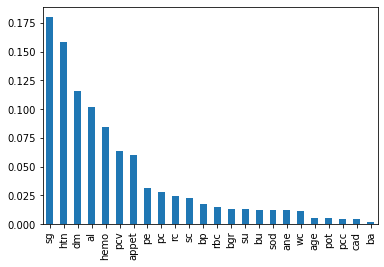

In [ ]:
feat_importances = pd.Series(me.feature_importances_, index=A.columns)
feat_importances.nlargest(24).plot(kind='bar')
plt.show()